# Load classified abstracts

In [1]:
from bs4 import BeautifulSoup
from collections import defaultdict
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
# Specify the suffix of the results file to analyse, after 'articles_???'
filesuffix='with_topics_LDA_2024-12-29'

In [3]:
wd=!pwd
wd=wd[0]
path=f'{wd}/Classification_results/'
abstracts_file=f'{path}articles_{filesuffix}.csv'
df_abstracts=pd.read_csv(abstracts_file, sep=',', header=0)
df_abstracts.head(10)


,Abstract,Title,DOI,MeSH_Terms,Pubmed link,drug_name_list,pubchem_id_list,PMID,year,output,cleaned_output,rawFeatures,features,topicDistribution,assigned_topic
0,It has been firmly established that opening an...,Oscillatory spatial profile of alcohol's effec...,DOI: 10.1016/j.alcohol.2013.12.004,"['Adult', 'Alcohol Drinking', 'Alcoholic Intox...",https://pubmed.ncbi.nlm.nih.gov/24530007/,['Ethanol'],[702],24530007,2014,"['firmly', 'establish', 'open', 'close', 'eye'...","['firmly', 'establish', 'open', 'close', 'eye'...","(1095,[2,7,8,12,14,35,36,49,50,57,59,62,63,64,...","(1095,[2,7,8,12,14,35,36,49,50,57,59,62,63,64,...","[0.00017765703377655462,0.4613673041209804,0.3...",1
1,Although the association between sleep and alc...,Effects of alcohol on sleep and the sleep elec...,DOI: 10.1111/j.1530-0277.2006.00111.x,"['Adult', 'Breath Tests', 'Electroencephalogra...",https://pubmed.ncbi.nlm.nih.gov/16737455/,['Ethanol'],[702],16737455,2006,"['association', 'sleep', 'alcohol', 'interest'...","['association', 'sleep', 'alcohol', 'interest'...","(1095,[0,46,70,109,136,141,143,171,173,208,209...","(1095,[0,46,70,109,136,141,143,171,173,208,209...","[0.06551824185238155,0.0014763574809555505,0.5...",2
2,This study examined neurofunctional correlates...,Spatio-temporal processing of words and nonwor...,DOI: 10.1016/j.brainres.2014.02.030,"['Adult', 'Alcoholic Intoxicationpathology', '...",https://pubmed.ncbi.nlm.nih.gov/24565928/,['Ethanol'],[702],24565928,2014,"['study', 'examine', 'neurofunctional', 'corre...","['study', 'examine', 'neurofunctional', 'corre...","(1095,[2,4,10,11,14,15,20,21,34,38,56,57,60,73...","(1095,[2,4,10,11,14,15,20,21,34,38,56,57,60,73...","[0.00025803465217964176,0.6457186329443783,0.0...",1
3,The electrophysiological inhibitory mechanism ...,Alcohol reduces cross-frequency theta-phase ga...,DOI: 10.1111/acer.12310,"['Adult', 'Central Nervous System Depressantsp...",https://pubmed.ncbi.nlm.nih.gov/24255944/,['Ethanol'],[702],24255944,2014,"['electrophysiological', 'inhibitory', 'mechan...","['electrophysiological', 'inhibitory', 'mechan...","(1095,[3,11,12,24,32,80,109,133,145,171,181,24...","(1095,[3,11,12,24,32,80,109,133,145,171,181,24...","[0.0010943020633708465,0.3967676964856989,0.07...",1
4,Time-of-day effects of ethanol consumption on ...,Time-of-day effects of ethanol consumption on ...,DOI: 10.2114/jpa.19.249,"['Adult', 'Alcohol Drinkingphysiopathology', '...",https://pubmed.ncbi.nlm.nih.gov/11204871/,['Ethanol'],[702],11204871,2000,"['timeofday', 'effect', 'ethanol', 'consumptio...","['timeofday', 'effect', 'ethanol', 'consumptio...","(1095,[3,15,19,24,28,32,33,36,51,53,59,72,87,9...","(1095,[3,15,19,24,28,32,33,36,51,53,59,72,87,9...","[0.00044381232517806516,0.0006157824201500192,...",5
5,Epidemiological and laboratory-based driving s...,Impairment due to combined sleep restriction a...,DOI: 10.1002/hup.2626,"['Adolescent', 'Adult', 'Alcohol Drinkingphysi...",https://pubmed.ncbi.nlm.nih.gov/28722214/,['Ethanol'],[702],28722214,2017,"['epidemiological', 'laboratorybased', 'drive'...","['epidemiological', 'laboratorybased', 'drive'...","(1095,[0,9,22,41,42,73,171,186,356,380,491,546...","(1095,[0,9,22,41,42,73,171,186,356,380,491,546...","[0.0011972493399018405,0.0016609750408184043,0...",5
6,TMS combined with simultaneous EEG is a novel ...,Effects of alcohol on TMS-evoked N100 responses.,DOI: 10.1016/j.jneumeth.2007.06.030,"['Adult', 'Biomarkersanalysis', 'Brain Mapping...",https://pubmed.ncbi.nlm.nih.gov/17727957/,['Ethanol'],[702],17727957,2007,"['tms', 'combine', 'simultaneous', 'eeg', 'bra...","['tms', 'combine', 'simultaneous', 'eeg', 'bra...","(1095,[2,3,5,7,8,10,17,20,21,23,27,34,43,45,47...","(1095,[2,3,5,7,8,10,17,20,21,23,27,34,43,45,47...","[0.00033947994287180153,0.5315760172868235,0.0...",1
7,The aim of the present study was to investigat...,Convergent and divergent effects of odors and ...,DOI: 10.1111/1469-8986.00023,"['Adult', 'Aldehydes', 'Color Perceptionphysio...",https://pubme

# Topics evolution over time

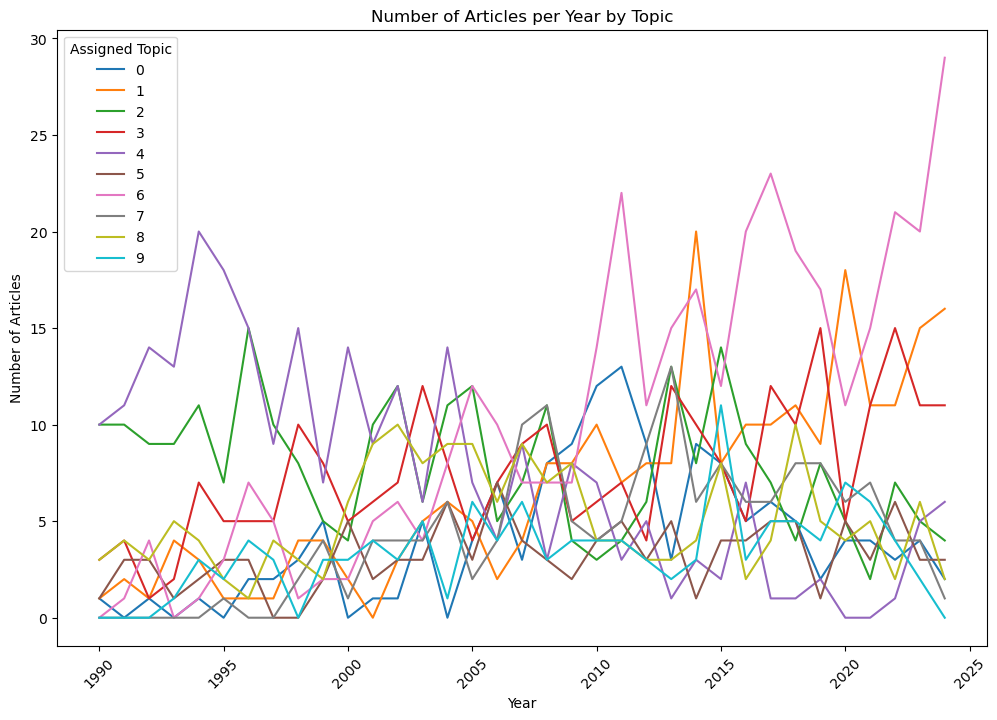

In [4]:
# Group by year and assigned_topic, then count the number of articles
articles_per_year_topic = df_abstracts.groupby(['year', 'assigned_topic']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 8))
articles_per_year_topic.plot(kind='line', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Year by Topic')
plt.xticks(rotation=45)
plt.legend(title='Assigned Topic')
plt.show()

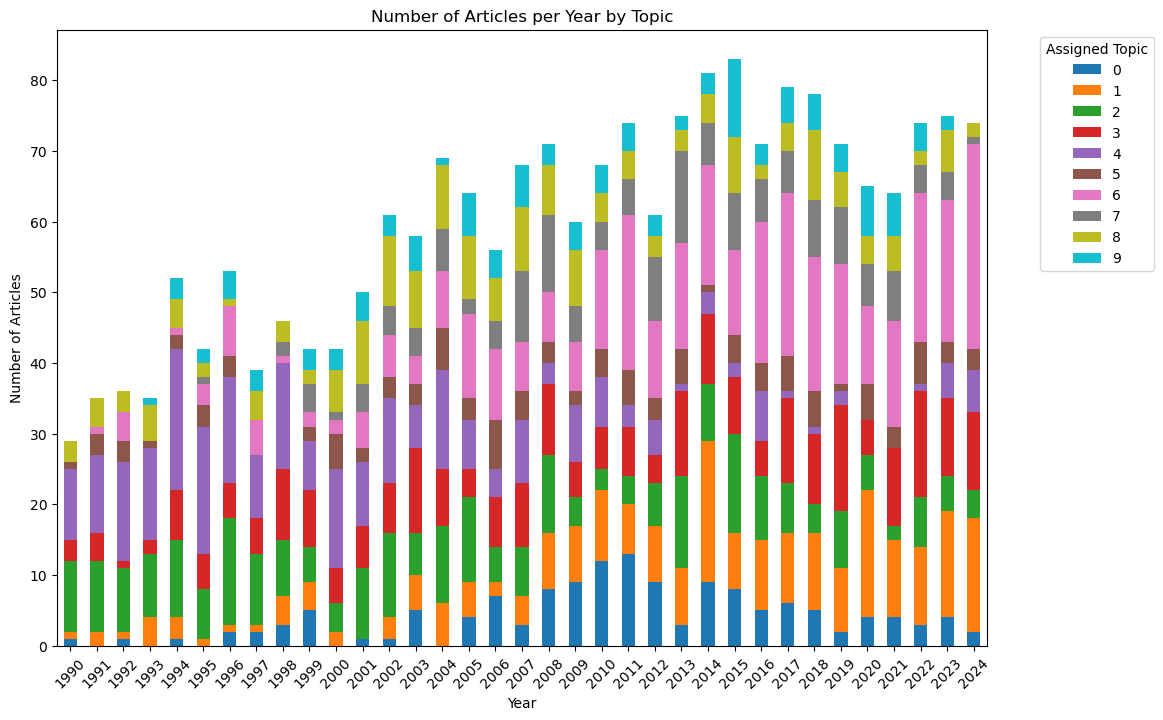

In [5]:
# Plot the data using stacked bars
plt.figure(figsize=(12, 8))
articles_per_year_topic.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Year by Topic')
plt.xticks(rotation=45)
plt.legend(title='Assigned Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Most common drugs and MeSH terms analysis per topic

In [ ]:

df_abstracts.info()

# Convert string representations of lists to actual lists
df_abstracts['drug_name_list'] = df_abstracts['drug_name_list'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_abstracts['MeSH_Terms'] = df_abstracts['MeSH_Terms'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Display the result
df_exploded = df_abstracts[['drug_name_list', 'MeSH_Terms', 'assigned_topic']]
# Explode the drug_name_list column
df_drugs = df_exploded[['drug_name_list','assigned_topic']].explode('drug_name_list').reset_index(drop=True)
# Group by assigned_topic and drug_name_list, then count the occurrences
drug_counts_per_topic = df_drugs.groupby(['assigned_topic', 'drug_name_list']).size().reset_index(name='count')

drug_counts_per_topic.head()
drug_counts_per_topic.info()


# Explode the drug_name_list column
df_Mesh = df_exploded[['MeSH_Terms', 'assigned_topic']].explode('MeSH_Terms').reset_index(drop=True)
mesh_counts_per_topic = df_Mesh.groupby(['assigned_topic', 'MeSH_Terms']).size().reset_index(name='count')

mesh_counts_per_topic.head()
mesh_counts_per_topic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101 entries, 0 to 2100
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Abstract           2101 non-null   object
 1   Title              2101 non-null   object
 2   DOI                2029 non-null   object
 3   MeSH_Terms         2101 non-null   object
 4   Pubmed link        2101 non-null   object
 5   drug_name_list     2101 non-null   object
 6   pubchem_id_list    2101 non-null   object
 7   PMID               2101 non-null   int64 
 8   year               2101 non-null   int64 
 9   output             2101 non-null   object
 10  cleaned_output     2101 non-null   object
 11  rawFeatures        2101 non-null   object
 12  features           2101 non-null   object
 13  topicDistribution  2101 non-null   object
 14  assigned_topic     2101 non-null   int64 
dtypes: int64(3), object(12)
memory usage: 246.3+ KB
<class 'pandas.core.frame.DataFrame'>
Ran

In [7]:
# Calculate the total count of drugs per topic
total_count_per_drug = drug_counts_per_topic.groupby('drug_name_list')['count'].sum().reset_index(name='total_count')
# Merge the total count with the original dataframe
drug_counts_per_topic = pd.merge(drug_counts_per_topic, total_count_per_drug, on='drug_name_list')
# Calculate the proportion of occurences within this topic
drug_counts_per_topic['proportion'] = drug_counts_per_topic['count'] / drug_counts_per_topic['total_count']
# Display the result
drug_counts_per_topic


,assigned_topic,drug_name_list,count,total_count,proportion
0,0,(S)-AMPA,2,9,0.222222
1,0,ALTANSERIN,1,1,1.000000
2,0,ANGIOTENSIN II,1,2,0.500000
3,0,Acetylcholine,3,43,0.069767
4,0,Adenosine,3,19,0.157895
...,...,...,...,...,...
1644,9,gluconate,1,1,1.000000
1645,9,ibotenate,1,1,1.000000
1646,9,lormetazepam,1,3,0.333333
1647,9,piperidine,16,136,0.117647


In [11]:
# Calculate the total count of MeSH terms per topic
total_count_per_mesh = mesh_counts_per_topic.groupby('MeSH_Terms')['count'].sum().reset_index(name='total_count')
# Merge the total count with the original dataframe
mesh_counts_per_topic = pd.merge(mesh_counts_per_topic, total_count_per_mesh, on='MeSH_Terms')
# Calculate the proportion
mesh_counts_per_topic['proportion'] = mesh_counts_per_topic['count'] / mesh_counts_per_topic['total_count']
# Display the result
mesh_counts_per_topic

,assigned_topic,MeSH_Terms,count,total_count_x,proportion,total_count_y,total_count
0,0,Acoustic Stimulation,9,76,0.118421,76,76
1,0,Acoustic Stimulationmethods,11,47,0.234043,47,47
2,0,Acoustic Stimulationmethodspsychology,2,3,0.666667,3,3
3,0,Acute Disease,3,8,0.375000,8,8
4,0,Adenosine,1,1,1.000000,1,1
...,...,...,...,...,...,...,...
10332,9,Xenopus laevis,1,1,1.000000,1,1
10333,9,Yohimbinepharmacology,1,4,0.250000,4,4
10334,9,Young Adult,39,530,0.073585,530,530
10335,9,Zolpidem,1,30,0.033333,30,30


In [12]:
# Threshold to set the proportion above which the drugs and MeSH terms are too common and discarded
threshold = num_topics*0.8

# Discard drugs mentioned in more than 80% of the topics
num_topics = df_abstracts['assigned_topic'].nunique()
drug_counts_filtered = drug_counts_per_topic[drug_counts_per_topic.groupby('drug_name_list')['assigned_topic'].transform('nunique') <= threshold]


# Discard MeSH mentioned in more than 80% of the topics
mesh_counts_filtered = mesh_counts_per_topic[mesh_counts_per_topic.groupby('MeSH_Terms')['assigned_topic'].transform('nunique') <= threshold]

In [13]:
# Calculate the weighted proportion for drugs
drug_counts_filtered['weighted_count'] = (drug_counts_filtered['count'] * drug_counts_filtered['proportion'])

ntopElements=20

# Get the top 20 drugs for each topic based on the highest weighted count
top_drugs_per_topic = drug_counts_filtered.groupby('assigned_topic').apply(lambda x: x.nlargest(ntopElements, 'weighted_count')).reset_index(drop=True)
# Print the top 20 drugs for each topic
print("Top drugs for each topic:")
top_drugs_per_topic

# Calculate the weighted count for MeSH terms
mesh_counts_filtered['weighted_count'] = (mesh_counts_filtered['count'] * mesh_counts_filtered['proportion'])
# Get the top 20 MeSH terms for each topic based on the weighted count
top_mesh_per_topic = mesh_counts_filtered.groupby('assigned_topic').apply(lambda x: x.nlargest(ntopElements, 'weighted_count')).reset_index(drop=True)
# Print the top 20 MeSH terms for each topic
print("\nTop MeSH terms for each topic:")
top_mesh_per_topic

Top drugs for each topic:

Top MeSH terms for each topic:


/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_32816/1210403810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_counts_filtered['weighted_count'] = (drug_counts_filtered['count'] * drug_counts_filtered['proportion'])
/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_32816/1210403810.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_drugs_per_topic = drug_counts_filtered.groupby('assigned_topic').apply(lambda x: x.nlargest

,assigned_topic,MeSH_Terms,count,total_count_x,proportion,total_count_y,total_count,weighted_count
0,0,Genotype,38,57,0.666667,57,57,25.333333
1,0,Gene Frequency,16,17,0.941176,17,17,15.058824
2,0,"Polymorphism, Single Nucleotide",17,22,0.772727,22,22,13.136364
3,0,Catechol O-Methyltransferasegenetics,13,14,0.928571,14,14,12.071429
4,0,Alleles,15,19,0.789474,19,19,11.842105
...,...,...,...,...,...,...,...,...
195,9,Glycine Plasma Membrane Transport Proteinsanta...,2,2,1.000000,2,2,2.000000
196,9,Nicotinic Antagonistspharmacology,2,2,1.000000,2,2,2.000000
197,9,Painchemically induceddrug therapy,2,2,1.000000,2,2,2.000000
198,9,Psychomotor Disorderschemically induced,2,2,1.000000,2,2,2.000000


In [22]:
# Calculate the total number of articles in each assigned_topic
total_articles_per_topic = df_abstracts.groupby('assigned_topic').size().reset_index(name='total_articles')

# Display the result
print(total_articles_per_topic)

   assigned_topic  total_articles
0               0             142
1               1             237
2               2             275
3               3             265
4               4             262
5               5             113
6               6             358
7               7             153
8               8             178
9               9             118


In [23]:
# Merge total_articles into top_20_drugs_per_topic
top_drugs_per_topic = top_drugs_per_topic.merge(total_articles_per_topic[['assigned_topic', 'total_articles']], on='assigned_topic', how='left')
# Merge total_articles into top_20_mesh_per_topic
top_mesh_per_topic = top_mesh_per_topic.merge(total_articles_per_topic[['assigned_topic', 'total_articles']], on='assigned_topic', how='left')


In [24]:

# Calculate the proportion of articles per topic for drugs
top_drugs_per_topic['proportion_articles_topic'] = (top_drugs_per_topic['count'] / top_drugs_per_topic['total_articles']) * 100

# Calculate the proportion of articles per topic for MeSH terms
top_mesh_per_topic['proportion_articles_topic'] = (top_mesh_per_topic['count'] / top_mesh_per_topic['total_articles']) * 100

# Display the results
top_drugs_per_topic[['assigned_topic', 'drug_name_list', 'proportion_articles_topic']]
top_mesh_per_topic[['assigned_topic', 'MeSH_Terms', 'proportion_articles_topic']]

,assigned_topic,MeSH_Terms,proportion_articles_topic
0,0,Genotype,26.760563
1,0,Gene Frequency,11.267606
2,0,"Polymorphism, Single Nucleotide",11.971831
3,0,Catechol O-Methyltransferasegenetics,9.154930
4,0,Alleles,10.563380
...,...,...,...
195,9,Glycine Plasma Membrane Transport Proteinsanta...,1.694915
196,9,Nicotinic Antagonistspharmacology,1.694915
197,9,Painchemically induceddrug therapy,1.694915
198,9,Psychomotor Disorderschemically induced,1.694915


In [25]:
# Group drugs and MeSH terms by topic
drugs_per_topic = top_drugs_per_topic.groupby('assigned_topic')['drug_name_list'].apply(list).reset_index(name='drug_name_list')
mesh_per_topic = top_mesh_per_topic.groupby('assigned_topic')['MeSH_Terms'].apply(list).reset_index(name='MeSH_Terms')

# Merge drugs and MeSH terms into a single dataframe
topic_description = pd.merge(drugs_per_topic, mesh_per_topic, on='assigned_topic')

# Merge with the total number of articles per topic
topic_description = pd.merge(topic_description, total_articles_per_topic, on='assigned_topic')

# Display the result
topic_description

,assigned_topic,drug_name_list,MeSH_Terms,total_articles
0,0,"[L-valine, L-Tryptophan, L-methionine, Armodaf...","[Genotype, Gene Frequency, Polymorphism, Singl...",142
1,1,"[L-Phenylalanine, Methamphetamine, Androgen, E...","[Models, Neurological, Antiparkinson Agentsthe...",237
2,2,"[Gaboxadol, Mianserin, Zolpidem, Zopiclone, Fl...","[Sleep, REMdrug effects, Sleep Stagesdrug effe...",275
3,3,"[2-deoxyglucose, Fludeoxyglucose F 18, L-aspar...","[Fluorodeoxyglucose F18, Aspartic Acidanalogs ...",265
4,4,"[Corticotropin, Triazolam, Zolpidem, Quinolone...","[Hydrocortisoneblood, Area Under Curve, Adreno...",262
5,5,"[Ethanol, L-Alanine, Cotinine, 4-substituted 2...","[Caffeinepharmacology, Breath Tests, Caffeine,...",113
6,6,"[Capsaicin, Morphine, Methamphetamine, PHENETH...","[Reward, Transcranial Magnetic Stimulationmeth...",358
7,7,"[Nicotine, Clozapine, Risperidone, S-(-)-sulpi...","[Acoustic Stimulation, Schizophreniadrug thera...",153
8,8,"[Midazolam, Nitrous oxide, Isoflurane, Remifen...","[Propofolpharmacology, Anesthesia, General, Se...",178
9,9,"[Scopolamine, Mecamylamine, Propanoic Acid, Pr...","[Models, Biological, Remifentanil, Memory Cons...",118


## Plotting of top MeSH and drugs per topic

/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_32816/1278558313.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_data['drug_name_list'], rotation=45, ha='right')
/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_32816/1278558313.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_data['drug_name_list'], rotation=45, ha='right')
/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_32816/1278558313.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_data['drug_name_list'], rotation=45, ha='right')
/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_32816/1278558313.py:11: UserWarning: set_ticklabels() should only be used with a

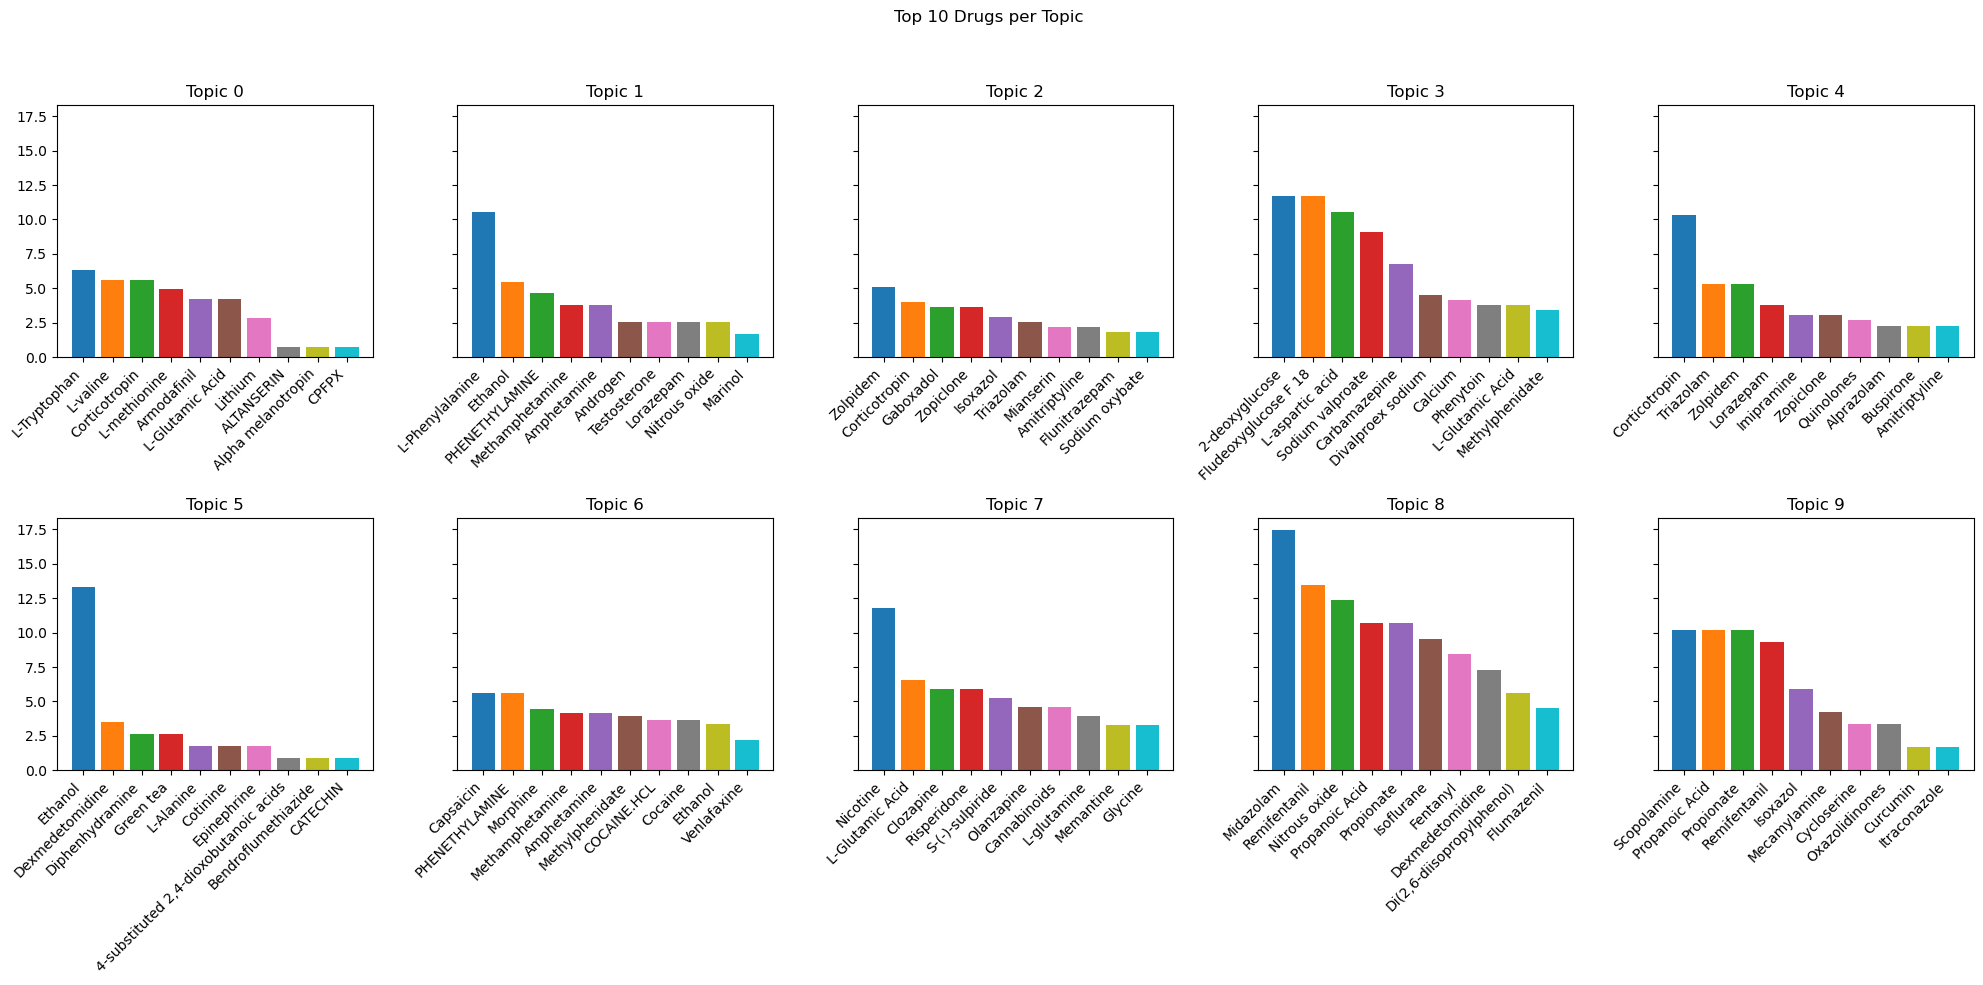

/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_32816/1278558313.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_data['MeSH_Terms'], rotation=45, ha='right')
/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_32816/1278558313.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_data['MeSH_Terms'], rotation=45, ha='right')
/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_32816/1278558313.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_data['MeSH_Terms'], rotation=45, ha='right')
/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_32816/1278558313.py:24: UserWarning: set_ticklabels() should only be used with a fixed numbe

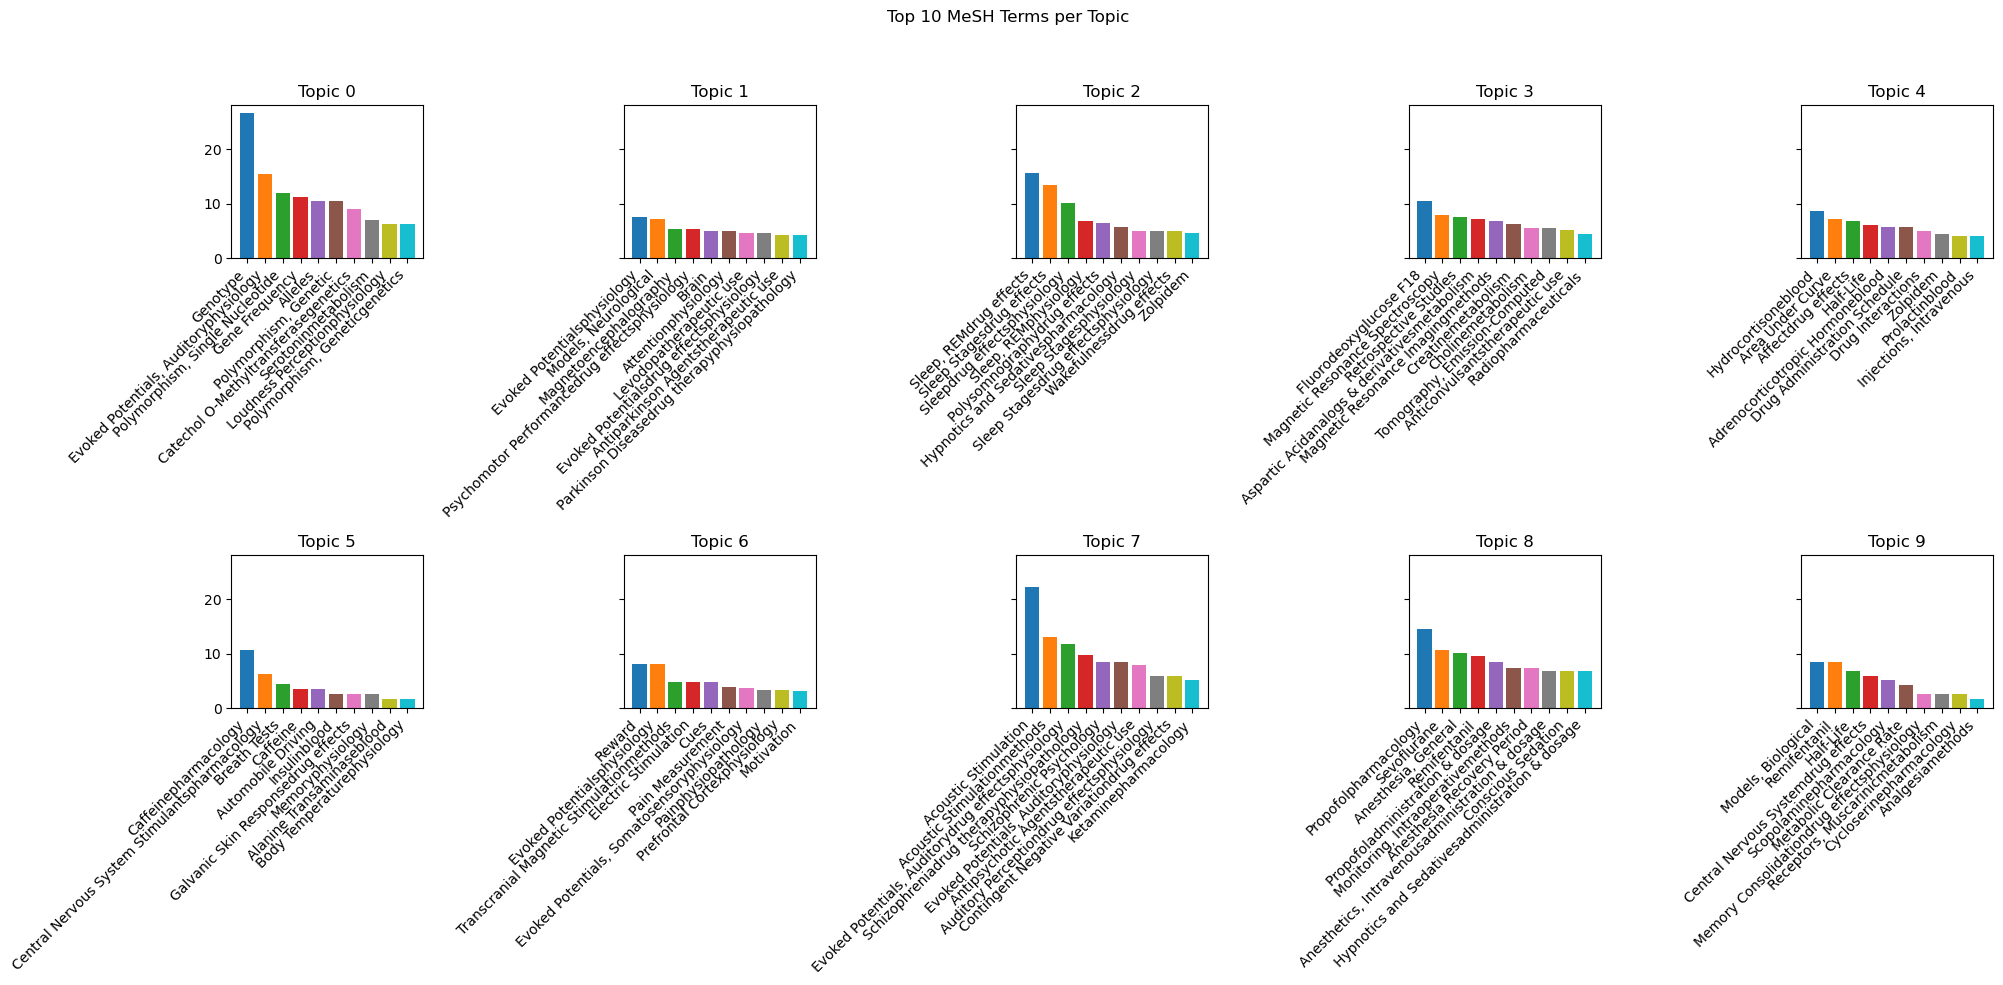

In [26]:
# Plotting the top 10 drugs per topic by selecting the higher proportion within the 20 selected per topic
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharey=True)
fig.suptitle('Top 10 Drugs per Topic')

colors = plt.cm.tab10.colors  # Use a colormap for colors

for i, ax in enumerate(axes.flatten()):
    topic_data = top_drugs_per_topic[top_drugs_per_topic['assigned_topic'] == i].nlargest(10, 'proportion_articles_topic')
    ax.bar(topic_data['drug_name_list'], topic_data['proportion_articles_topic'], color=colors)
    ax.set_title(f'Topic {i}')
    ax.set_xticklabels(topic_data['drug_name_list'], rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plotting the top 5 MeSH terms per topic
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharey=True)
fig.suptitle('Top 10 MeSH Terms per Topic')

for i, ax in enumerate(axes.flatten()):
    topic_data = top_mesh_per_topic[top_mesh_per_topic['assigned_topic'] == i].nlargest(10, 'proportion_articles_topic')
    ax.bar(topic_data['MeSH_Terms'], topic_data['proportion_articles_topic'], color=colors)
    ax.set_title(f'Topic {i}')
    ax.set_xticklabels(topic_data['MeSH_Terms'], rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Validation

## ASK user input to assign names to each cluster

In [29]:
# Iterate through each topic and print the top 20 MeSH terms
for topic in topic_description['assigned_topic']:
    print(f"Top 20 MeSH terms for Topic {topic}:")
    top_mesh_terms = top_mesh_per_topic[top_mesh_per_topic['assigned_topic'] == topic].nlargest(20, 'weighted_count')
    print(top_mesh_terms[['MeSH_Terms', 'weighted_count']])
    
    # Get user input for cluster name
    cluster_name = input(f"Enter the cluster name for Topic {topic}: ")
    while cluster_name =='':
        cluster_name = input("Invalid input. Give a cluster name: ")
    # Add the cluster name to the topic_description dataframe
    topic_description.loc[topic_description['assigned_topic'] == topic, 'cluster_name'] = cluster_name

# Display the updated topic_description dataframe
topic_description

Top 20 MeSH terms for Topic 0:
                                           MeSH_Terms  weighted_count
0                                            Genotype       25.333333
1                                      Gene Frequency       15.058824
2                     Polymorphism, Single Nucleotide       13.136364
3                Catechol O-Methyltransferasegenetics       12.071429
4                                             Alleles       11.842105
5                               Polymorphism, Genetic       11.842105
6               Evoked Potentials, Auditoryphysiology        9.490196
7                       Loudness Perceptionphysiology        8.100000
8                   Genetic Predisposition to Disease        8.000000
9                               Reaction Timegenetics        7.000000
11  Serotonin Plasma Membrane Transport Proteinsge...        5.818182
10            Polymorphism, Single Nucleotidegenetics        5.818182
12                      Polymorphism, Geneticgenetics      

,assigned_topic,drug_name_list,MeSH_Terms,total_articles,cluster_name
0,0,"[L-valine, L-Tryptophan, L-methionine, Armodaf...","[Genotype, Gene Frequency, Polymorphism, Singl...",142,gene
1,1,"[L-Phenylalanine, Methamphetamine, Androgen, E...","[Models, Neurological, Antiparkinson Agentsthe...",237,models
2,2,"[Gaboxadol, Mianserin, Zolpidem, Zopiclone, Fl...","[Sleep, REMdrug effects, Sleep Stagesdrug effe...",275,sleep
3,3,"[2-deoxyglucose, Fludeoxyglucose F 18, L-aspar...","[Fluorodeoxyglucose F18, Aspartic Acidanalogs ...",265,imaging
4,4,"[Corticotropin, Triazolam, Zolpidem, Quinolone...","[Hydrocortisoneblood, Area Under Curve, Adreno...",262,hormones
5,5,"[Ethanol, L-Alanine, Cotinine, 4-substituted 2...","[Caffeinepharmacology, Breath Tests, Caffeine,...",113,pk
6,6,"[Capsaicin, Morphine, Methamphetamine, PHENETH...","[Reward, Transcranial Magnetic Stimulationmeth...",358,schizo
7,7,"[Nicotine, Clozapine, Risperidone, S-(-)-sulpi...","[Acoustic Stimulation, Schizophreniadrug thera...",153,sedation
8,8,"[Midazolam, Nitrous oxide, Isoflurane, Remifen...","[Propofolpharmacology, Anesthesia, General, Se...",178,anasthesia
9,9,"[Scopolamine, Mecamylamine, Propanoic Acid, Pr...","[Models, Biological, Remifentanil, Memory Cons...",118,anesthesa


## Sample 20 articles for each cluster

In [30]:
import random

# Create a new dataframe to store the validation results
validation_results = []

# Iterate through each topic and print the cluster name
for topic in topic_description['assigned_topic']:
    cluster_name = topic_description.loc[topic_description['assigned_topic'] == topic, 'cluster_name'].values[0]
    print(f"Cluster Name: {cluster_name}")
    # Get 20 random titles from the assigned topic
    titles = df_abstracts[df_abstracts['assigned_topic'] == topic]['Title'].sample(n=20, random_state=1).tolist()
    for title in titles:
        validation_results.append({'assigned_topic': topic, 'cluster_name': cluster_name, 'title': title})
    

# Convert the validation results to a dataframe
test_validation_df = pd.DataFrame(validation_results)


Cluster Name: gene
Cluster Name: models
Cluster Name: sleep
Cluster Name: imaging
Cluster Name: hormones
Cluster Name: pk
Cluster Name: schizo
Cluster Name: sedation
Cluster Name: anasthesia
Cluster Name: anesthesa


In [31]:
# Append articles info
test_validation_df = test_validation_df.merge(df_abstracts[['Title', 'Abstract', 'MeSH_Terms', 'drug_name_list', 'PMID', 'year']], left_on='title', right_on='Title', how='left')
# Drop the duplicate 'Title' column
test_validation_df = test_validation_df.drop(columns=['Title'])

# Display the updated validation results
test_validation_df

,assigned_topic,cluster_name,title,Abstract,MeSH_Terms,drug_name_list,PMID,year
0,0,gene,Narcissism and central serotonergic neurotrans...,"Based on previous research, it has been propos...","[Humans, Cross-Sectional Studies, Depression, ...",[SEROTONIN],35757904,2023
1,0,gene,Lost in translation? The potential psychobioti...,Preclinical studies have identified certain pr...,"[Adult, Attentiondrug effects, Braindrug effec...",[JB-1],27865949,2017
2,0,gene,Dose-related effects of selective 5-HT2 recept...,The effects of the selective 5-HT2 receptor an...,"[Adult, Dose-Response Relationship, Drug, Elec...","[ICI-169369, piperidine, SEROTONIN, Ritanserin]",2117764,1990
3,0,gene,Multivariate genetic determinants of EEG oscil...,Schizophrenia (SZ) and psychotic bipolar disor...,"[Adult, Bipolar Disordergeneticsphysiopatholog...",[L-Glutamic Acid],26101851,2015
4,0,gene,Dual-Targeted Autoimmune Sword in Fatal Epilep...,Nodding Syndrome (NS) is a fatal pediatric epi...,"[Adolescent, Adult, Autoantibodiesbloodimmunol...","[Acetylcholine, (S)-AMPA, Dopamine]",32561150,2020
...,...,...,...,...,...,...,...,...
195,9,anesthesa,Disruption of cortical connectivity during rem...,The authors investigated the effect of remifen...,"[Adult, Analgesiamethods, Analgesics, Opioidto...","[piperidine, Propionate, Propanoic Acid, Remif...",25401419,2015
196,9,anesthesa,The influence of age on propofol pharmacodynam...,The authors studied the influence of age on th...,"[Adolescent, Adult, Age Factors, Aged, Anesthe...",[PHENOL],10360845,1999
197,9,anesthesa,Acetylcholine modulates human working memory a...,Working memory (WM) can be defined as the abil...,"[Acetylcholinemetabolism, Adult, Alpha Rhythmp...","[Muscarine, Acetylcholine, Galantamine]",27222217,2016
198,9,anesthesa,Xenon does not affect gamma-aminobutyric acid ...,The noble gas xenon acts as an anesthetic with...,"[Adult, Anestheticsadministration & dosagephar...","[Xenon, Benzodiazepine, Flumazenil]",18165567,2008


# Saving the results

In [32]:
import os
from pyspark.sql.functions import expr, col, array_max
import datetime

# Save the list of articles (pmid + topic assigned)
date = datetime.datetime.now().strftime("%Y-%m-%d")
articles_output_path = os.path.join(path, f'topics_{filesuffix}_{date}.csv')
topic_description.to_csv(articles_output_path, index=False)
validation_output_path = os.path.join(path, f'validation_topics_{filesuffix}_{date}.csv')
test_validation_df.to_csv(validation_output_path, index=False)